Trip Type Walmart

Describe the feature space
1. What's the size of it
2. Type of each variable, numeric vs categorical
3. Univariate plot (Histogram, density plot etc.)

Plot Y vs. X

In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('train.csv')

In [4]:
print train.head()
print train.tail()

   TripType  VisitNumber Weekday          Upc  ScanCount  \
0       999            5  Friday  68113152929         -1   
1        30            7  Friday  60538815980          1   
2        30            7  Friday   7410811099          1   
3        26            8  Friday   2238403510          2   
4        26            8  Friday   2006613744          2   

   DepartmentDescription  FinelineNumber  
0     FINANCIAL SERVICES            1000  
1                  SHOES            8931  
2          PERSONAL CARE            4504  
3  PAINT AND ACCESSORIES            3565  
4  PAINT AND ACCESSORIES            1017  
        TripType  VisitNumber Weekday          Upc  ScanCount  \
647049        39       191346  Sunday  32390001778          1   
647050        39       191346  Sunday   7874205336          1   
647051        39       191346  Sunday         4072          1   
647052         8       191347  Sunday   4190007664          1   
647053         8       191347  Sunday   3800059655      

In [5]:
print train.shape

(647054, 7)


In [6]:
print train['Weekday'].unique()

['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [7]:
train['Weekday'].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
dtype: int64

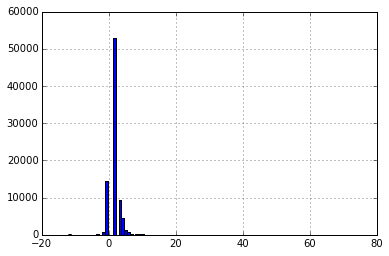

In [8]:
train[train.ScanCount!=1]['ScanCount'].hist(bins=100)

In [9]:
print train['ScanCount'].value_counts()

 1     561489
 2      53002
-1      14394
 3       9445
 4       4536
 5       1380
 6        866
-2        814
 8        246
 7        228
-3        143
 10       130
 9         88
-4         76
 12        60
 11        45
-5         16
 14        15
 13        13
 15        12
-6         10
 20         7
 16         6
 18         4
 24         4
 19         4
 25         3
 17         3
 23         3
 22         2
-9          2
 30         1
 46         1
 51         1
 71         1
-12         1
-10         1
-7          1
 31         1
dtype: int64


- TripType Count

Axes(0.125,0.125;0.775x0.775)


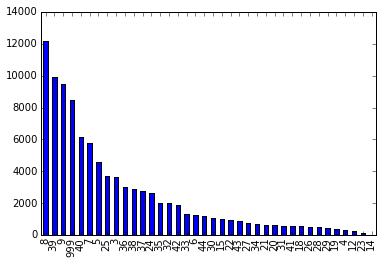

In [6]:
trainByVisit = train.drop_duplicates('VisitNumber')[['TripType','VisitNumber','Weekday']]
trainByVisit['TripType'].value_counts().plot(kind='bar')

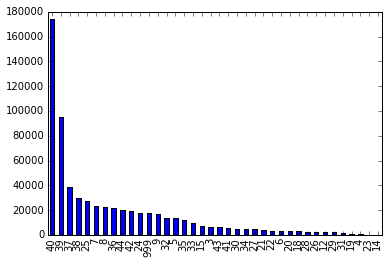

In [7]:
train['TripType'].value_counts().plot(kind='bar')

In [10]:
print train.isnull().any()

TripType                 False
VisitNumber              False
Weekday                  False
Upc                       True
ScanCount                False
DepartmentDescription     True
FinelineNumber            True
dtype: bool


In [11]:
print train[pd.isnull(train['Upc'])].head()

      TripType  VisitNumber Weekday  Upc  ScanCount DepartmentDescription  \
25          26            8  Friday  NaN          1                   NaN   
548         27          259  Friday  NaN          3                   NaN   
549         27          259  Friday  NaN          1                   NaN   
959        999          409  Friday  NaN         -1                   NaN   
1116        39          479  Friday  NaN          1                   NaN   

      FinelineNumber  
25               NaN  
548              NaN  
549              NaN  
959              NaN  
1116             NaN  


In [8]:
trainWithNa = train[pd.isnull(train['Upc'])]

- TripType Count when upc is missing

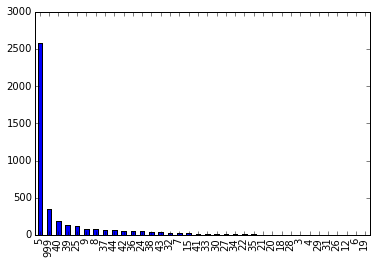

In [9]:
trainWithNa['TripType'].value_counts().plot(kind='bar')

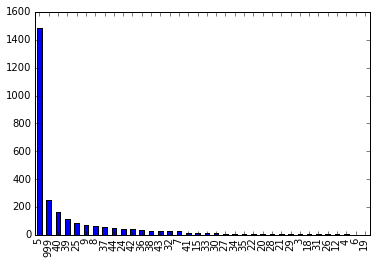

In [55]:
triptypeNaGrouped = trainWithNa.drop_duplicates('VisitNumber')
triptypeNaGrouped['TripType'].value_counts().plot(kind='bar')

In [19]:
print trainWithNa[trainWithNa.ScanCount<0]['TripType'].value_counts()

999    184
5       11
40       9
37       8
39       7
36       6
38       5
8        4
44       2
25       2
15       2
9        2
7        2
30       2
34       1
32       1
24       1
22       1
dtype: int64


In [20]:
print trainWithNa[trainWithNa.TripType==999]['ScanCount'].value_counts()

-1    168
 1    159
 2      7
-2      7
-3      5
-4      3
 3      2
-6      1
dtype: int64


In [63]:
returnPharmacy = trainWithNa[trainWithNa.ScanCount<0][pd.notnull(trainWithNa.DepartmentDescription)]
print returnPharmacy['TripType'].value_counts()

999    50
5      11
36      5
8       1
dtype: int64
